#Trabalho Final da Disciplina de

Alunos:
- ELIKAH DE SANTANA E FRANCA SANTHIAGO
- FLÁVIO ROBERTO GUERRA SEABRA
- SANDERSON LELIS DE MACEDO COSTA


Objetivo:
Este trabalho teve como objetivo principal desenvolver um modelo preditivo de afastamentos por motivo de saúde analisando padrões e tendências em afastamentos médicos dos servidores do TRE-RN, utilizando um conjunto de dados históricos de 2000 a 2023.

Um modelo preditivo pode ser utilizado para:

- Identificação precoce de riscos: Identificar servidores com maior probabilidade de necessitar de afastamento, permitindo a implementação de medidas preventivas e programas de bem-estar direcionados.

- Alocação otimizada de recursos: Alocar recursos de saúde de forma mais eficiente, direcionando-os para áreas e indivíduos com maior necessidade.

- Planejamento de contingência: Prever a demanda por afastamentos em diferentes períodos, permitindo um planejamento de contingência mais eficaz para garantir a continuidade das atividades do TRE-RN.

##Etapas:

1. Coleta de dados:
  - Foram coletados dados de 3 fontes:
    - Do módulo Afastamentos do sistema SGRH foi coletada um Dataset com uma série com todos os afastamentos por motivo de saúde de 2000 a 2023.
      - Um total de 12402 registros de afastamentos por motivo de saúde foram coletados, dos tipos LICENÇA PARA TRATAMENTO DA PRÓPRIA SAÚDE, LICENÇA POR DOENÇA EM PESSOA DA FAMÍLIA, LICENÇA POR ACIDENTE EM SERVIÇO e LICENÇA À GESTANTE.
    - Do módulo Gestão do sistema SGRH foram coletados de cada servidor os dados:
      - Data de nascimento, da qual foi extraída a informação 'Idade';
      - Data da posse, da qual foi extraída a informação 'Tempo de Serviço'
      - Sexo declarado: Masculino ou Feminino
      - Identidade de gênero: Cisgênero, Transgênero, Transexual, Travesti, Gênero fluido, Agênero, Outra ou Não informado;
      - Raça/Cor da pele declarada: Amarela, Branca, Indígena, Parda, Negra, Não informada;
      - Se foi aprovado em regime de cotas: Não, Cota étnico-racial, Cota para pessoa com deficiência, Cota para Gênero, Cota para outras ações afirmativas, Não Informado;
    - Do portal de Dados Abertos do TRE-RN foi coletado um um Dataset com os seguintes dados de cada servidor:
      - Lotação: Sede ou Zonas Eleitorais;
      - Nível de escolaridade: Intermediário ou Superior;
      - Cargo: 'ANALISTA JUDICIARIO', 'TECNICO JUDICIARIO';
      - Área: 'ADMINISTRATIVA', 'APOIO ESPECIALIZADO', 'JUDICIÁRIA'
      - Situação: 'REQUISITADO', 'EFETIVO', 'EXERCÍCIO PROVISÓRIO',
       'EFETIVO REMOVIDO', 'REMOVIDO PARA ESTE TRIBUNAL',
       'SEM VÍNCULO EFETIVO', 'EFETIVO CEDIDO', 'EFETIVO LICENCIADO';
      - Comissão: Sim ou Não (se o servidor recebe alguma função comissionada ou não)

2. Pré-processamento
  - Como não foi possível obter dados dos servidores que não estavam no Dataset extraído do portal dados abertos, os dados de afastamentos destes servidores foram descartados, resultando em um Dataset final com 6106 instâncias.
  - Todos os dados de identificação foram removidos
  - Os dados de CID foram tratados para permanecer apenas a letra, que é o dado que corresponde a uma classe mais ampla de doenças.
  - O procedimento de One-Hot-Encode foi executado para as variáveis:
    - 'lotacao', 'nivel', 'cargo', 'area', 'situacao', 'comissao', 'tipo_afastamento', 'CID_letter', 'Sexo', 'id_gen', 'raca_cor', 'defic' e 'cotas'
  - Como foi observado que 59% dos afastamentos são de até 2 dias, foi criada uma feature 'Classe' com valor 0 para afastamentos com duração de de até 2 dias e valor 1 para afastamentos com duração a partir de 3 dias.
  - O dataframe final foi salvo no arquivo *df_afastamentos_para_Topicos.csv*
  




#Carregar o dataset a partir do arquivo pré-processado df_afastamentos_para_Topicos.csv

In [1]:
import pandas as pd
df = pd.read_csv('/content/df_afastamentos_para_Topicos.csv')
df.head()

,dias_afastamento,idade,tempo_serv,lotacao_sede,lotacao_zona,nivel_INTERMEDIÁRIO,nivel_SUPERIOR,cargo_ANALISTA JUDICIARIO,cargo_TECNICO JUDICIARIO,area_ADMINISTRATIVA,...,raca_cor_5,raca_cor_6,defic_1,defic_2,defic_3,defic_5,defic_8,cotas_1,cotas_3,classe
0,2,46.0,18.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
1,15,46.0,18.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,1
2,2,46.0,18.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
3,2,46.0,18.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,0
4,7,46.0,18.0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,1,1,0,1


In [2]:
from sklearn.preprocessing import StandardScaler


#Análise Usando MLP

Importando as bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Carregando os dados

In [ ]:
data = df.copy()
dropar = ['dias_afastamento']
data = data.drop(dropar, axis=1)

Isolando a Classe

In [ ]:
X = data.drop('classe', axis=1)
y = data['classe']

Dividir os dados em conjuntos de treinamento e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Configurando a MLP com no máximo 1000 iterações

In [ ]:
mlp = MLPClassifier(max_iter=1000)

Definir os parâmetros para um GridSearch

1. Configuração diferente para as camadas ocultas (hidden_layer_sizes):
  - (50,): Uma única camada oculta com 50 neurônios.
  - (100,): Uma única camada oculta com 100 neurônios.
  - (50, 50): Duas camadas ocultas, cada uma com 50 neurônios.

2. Função de ativação a ser usada nas camadas ocultas
(activation):
  - 'tanh': Função tangente hiperbólica.
  - 'relu': Função ReLU (Rectified Linear Unit)

3. Algoritmo de otimização a ser usado para treinar a rede neural ajustando os pesos da rede para minimizar a função de perda (solver)
  - 'adam': Algoritmo Adam (Adaptive Moment Estimation).
  - 'sgd': Algoritmo SGD (Stochastic Gradient Descent).

4. Parâmetro de regularização L2 (alpha).
  - 0.0001: Regularização muito fraca.
  - 0.001: Regularização moderada.
  - 0.01: Regularização mais forte.

5. Estratégia de taxa de aprendizado(learning_rate).
  - 'constant': A taxa de aprendizado permanece constante durante todo o treinamento.
  - 'adaptive': A taxa de aprendizado se adapta durante o treinamento, diminuindo à medida que o modelo converge.

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

Roda o GridSearch usando '*best_params_*' para  criar um dicionário com a melhor combinação de hiperparâmetros

In [ ]:
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros: {grid_search.best_params_}")

Avaliando o modelo com os melhores parâmetros encontrados na Grid Search

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Imprimindo resultados

Melhores parâmetros: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       873
           1       0.58      0.23      0.33       349

    accuracy                           0.73      1222
   macro avg       0.67      0.58      0.58      1222
weighted avg       0.70      0.73      0.69      1222



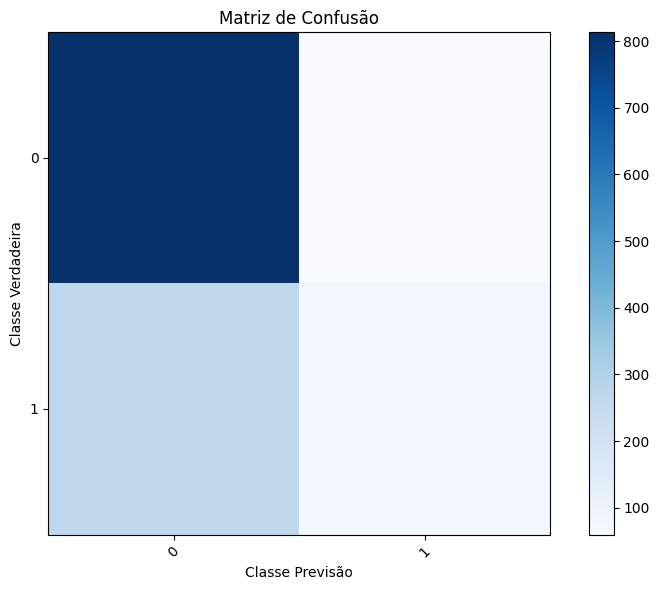

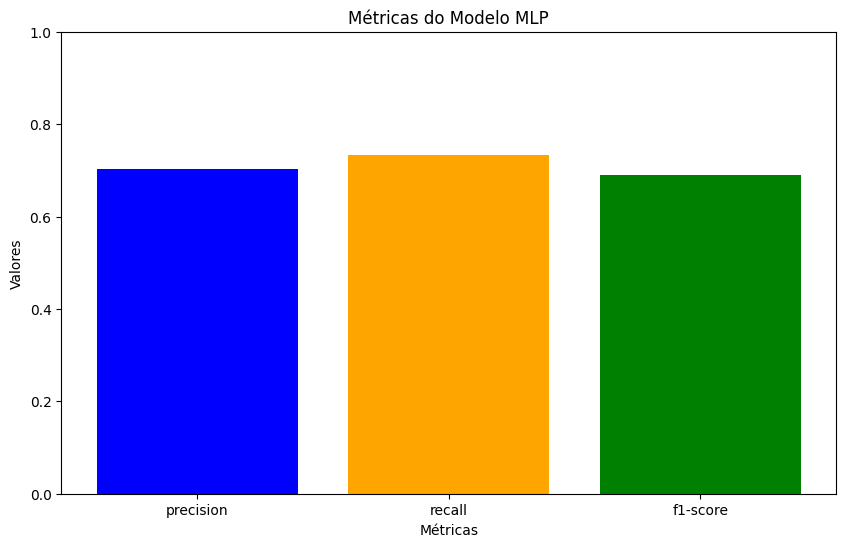

In [ ]:

# Impressão do relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Classe Previsão')
plt.ylabel('Classe Verdadeira')
plt.tight_layout()
plt.show()

# Gráfico das métricas principais
metrics = ['precision', 'recall', 'f1-score']
scores = {
    'precision': [],
    'recall': [],
    'f1-score': []
}

for metric in metrics:
    scores[metric] = classification_report(y_test, y_pred, output_dict=True)['weighted avg'][metric]

# Plotar as métricas
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color=['blue', 'orange', 'green'])
plt.title('Métricas do Modelo MLP')
plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.ylim(0, 1)
plt.show()

#Análise usando LSTM

Importando as bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix

Carregando os dados

In [4]:
data = df.copy()
dropar = ['dias_afastamento']
data = data.drop(dropar, axis=1)

Isolando a Classe

In [5]:
X = data.drop('classe', axis=1).values
y = data['classe'].values

Padronizando os dados para terem média 0 e desvio padrão 1

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dividindo os dados em conjuntos de treinamento e teste com 80% para treino e 20% para teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Remodelando os dados de treinamento e teste para 3D (n_samples, timesteps, n_features) para uso da LSTM, onde n_samples é o tamanho da amostra, n_features é a qantidade de features e timesteps é 1 porque cada amostra representa um único "instante" com características do servidor

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Convertendo dados NumPy para tensores PyTorch

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

Criando o Modelo LSTM com uma camada LSTM seguida por uma camada totalmente conectada

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Pega a saída do último timestep
        return out

Definindo os hiperparâmetros que serão usados:
  - input_size = X_train.shape[2]
    - acessa o terceiro elemento da tupla X_train.shape, que corresponde ao número de features e atribui à variável input_size que definirá a dimensão da entrada da camada LSTM no modelo
  - hidden_size = 64
    - significa que a camada LSTM terá 64 unidades (neurônios) ocultas
  - output_size = len(np.unique(y))
    - Atribui o número de classes à variável output_size. Nesse caso, 2 classes
  - num_epochs = 50
    - Define que o modelo será treinado passando pelo conjunto de dados de treinamento 50 vezes
  - batch_size = 32
    - Define que o modelo será treinado usando lotes de 32 amostras de dados de cada vez.
  - learning_rate = 0.001
    - Define que o tamanho dos passos que o otimizador dará na direção do mínimo da função de perda será de 0,001


In [ ]:
# Hiperparâmetros
input_size = X_train.shape[2]
hidden_size = 64
output_size = len(np.unique(y))  # Número de classes
num_epochs = 50
batch_size = 32
learning_rate = 0.001

Instanciando o modelo, escolhendo uma função de perda e selecionando um otimizador para atualizar os pesos do modelo durante o treinamento

In [ ]:
model = LSTMModel(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Treinar o modelo

In [ ]:
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Perda: {loss.item():.4f}')

Avalia o modelo em um conjunto de dados separado (o conjunto de teste) usando context manager do PyTorch

In [ ]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, y_pred_classes = torch.max(y_pred, 1)

Imprime relatórios e métricas

Época [10/50], Perda: 0.6622
Época [20/50], Perda: 0.6318
Época [30/50], Perda: 0.6007
Época [40/50], Perda: 0.5742
Época [50/50], Perda: 0.5582
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       873
           1       0.71      0.11      0.19       349

    accuracy                           0.73      1222
   macro avg       0.72      0.55      0.52      1222
weighted avg       0.73      0.73      0.66      1222



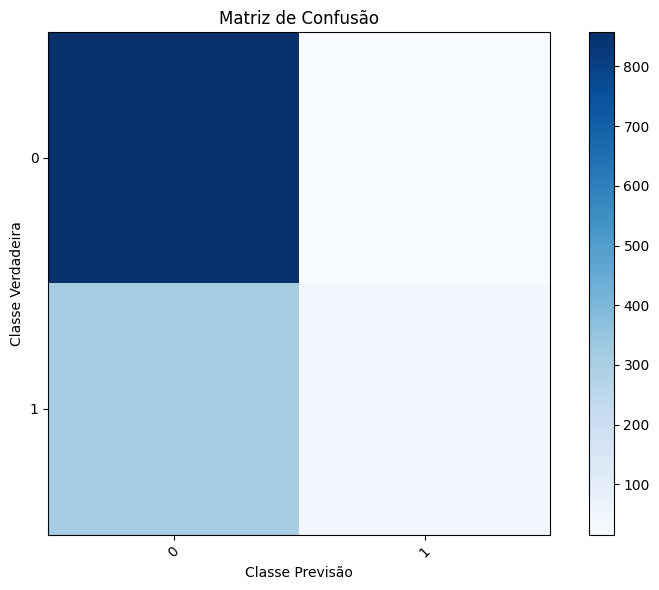

In [ ]:
# Relatório de classificação
print(classification_report(y_test_tensor.numpy(), y_pred_classes.numpy()))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_tensor.numpy(), y_pred_classes.numpy())

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Classe Previsão')
plt.ylabel('Classe Verdadeira')
plt.tight_layout()
plt.show()



# Conclusão

Ambos os modelos mostraram dificuldade em prever a classe '1' (afastamentos a partir de 3 dias), como evidenciado pelo baixo recall e f1-score. Isso pode ser atribuído a diversos fatores, incluindo um desbalanceamento nas classes (a classe '0' é mais representativa) ou à complexidade inerente da previsão de afastamentos de saúde, que podem ser influenciados por uma gama vasta e interconectada de variáveis.